# Calculating Event-Related Potentials (ERPs)

In this tutorial, we will use a prepared data set to calculate ERPs

In [1]:
# import the necessary packages
import mne
from mne.datasets import sample

In [7]:
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'
event_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw-eve.fif'
# these data already have an EEG average reference
raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.pick_types(meg=False, eeg=True, eog=True)

Opening raw data file /home/kosch/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 60 x 41700 (277.7 sec), ~22.1 MB, data loaded>

In [8]:
# you can always have a look at the structure of the EEG setup
print(raw.info)

<Info | 19 non-empty fields
    bads : list | 0 items
    ch_names : list | EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, ...
    chs : list | 60 items (EEG: 59, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
    events : list | 0 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 40.0 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 60
    proc_history : list | 0 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off, ...
    sfreq : float | 150.15374755859375 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_syst

In [9]:
# mne allows to rename the channels. Let's do this for the EOG channel for convenience
raw.rename_channels(mapping={'EOG 061': 'EOG'})
raw.set_channel_types(mapping={'EOG': 'eog'})

In [10]:
# Let's have a look at the electrode layout
raw.plot_sensors()
raw.plot_sensors('3d')  # in 3D

<Figure size 640x640 with 1 Axes>

<Figure size 640x640 with 1 Axes>

<Figure size 640x640 with 1 Axes>

EEG data marked as already having the desired reference. Preventing automatic future re-referencing to an average reference.
Removing existing average EEG reference projection.
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
3 projection items activated
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EEG : ['EEG 007']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EOG : ['EOG']
    Rejecting  epoch based on EEG : ['EEG 001', 'EEG 002', 'EEG 003', 'EEG 007']
    R

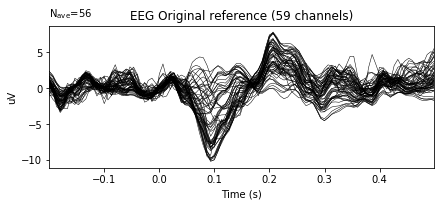

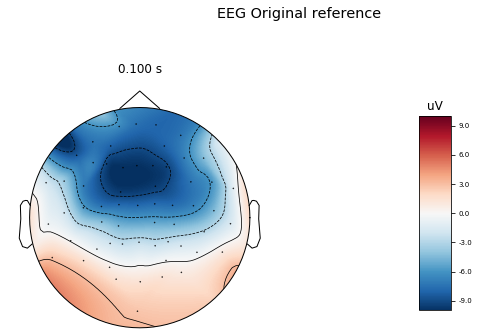

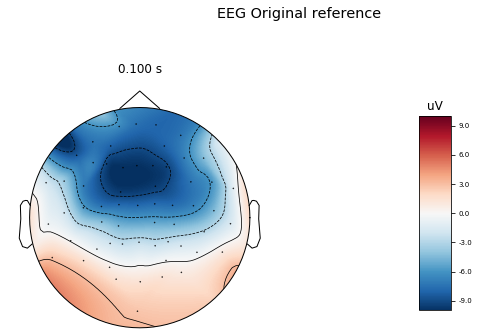

In [11]:
raw_no_ref, _ = mne.set_eeg_reference(raw, [])
# reject trials based on the thresholds
reject = dict(eeg=180e-6, eog=150e-6)
# plot ERPs between -0.2 and 0.5 seconds
event_id, tmin, tmax = {'left/auditory': 1}, -0.2, 0.5
events = mne.read_events(event_fname)
epochs_params = dict(events=events, event_id=event_id, tmin=tmin, tmax=tmax,
                     reject=reject)

evoked_no_ref = mne.Epochs(raw_no_ref, **epochs_params).average()
del raw_no_ref  # save memory

title = 'EEG Original reference'
evoked_no_ref.plot(titles=dict(eeg=title), time_unit='s')
evoked_no_ref.plot_topomap(times=[0.1], size=3., title=title, time_unit='s')